In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from time import time
import datetime


In [2]:
pip install yfinance

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     --- ------------------------------------ 0.3/3.0 MB ? eta -:--:--
     ------- -------------------------------- 0.5/3.0 MB 932.9 kB/s eta 0:00:03
     ---------- ----------------------------- 0.8/3.0 MB 1.0 MB/s eta 0:00:03
     ----------------- ---------------------- 1.3/3.0 MB 1.3 MB/s eta 0:00:02
     ---------------------------- ----------- 2.1/3.0 MB 2.0 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 2.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml)

In [5]:
#import the data... TCS
tickersymbol = "TCS.NS"
data= yf.Ticker(tickersymbol)
data

yfinance.Ticker object <TCS.NS>

In [15]:
# To print historical stock data (by default last 5 years)
print(data.history())

# print(data.info)

# print(data.balance_sheet)

# print(data.financials)

# print(data.cashflow)

# print(data.actions)


# print(data.major_holders)


# print(data.institutional_holders)

                                  Open         High          Low        Close  \
Date                                                                            
2024-08-12 00:00:00+05:30  4230.000000  4239.000000  4186.350098  4195.649902   
2024-08-13 00:00:00+05:30  4213.000000  4234.000000  4183.000000  4196.950195   
2024-08-14 00:00:00+05:30  4209.000000  4306.200195  4188.149902  4295.250000   
2024-08-16 00:00:00+05:30  4350.000000  4427.000000  4325.100098  4416.049805   
2024-08-19 00:00:00+05:30  4421.000000  4494.250000  4390.350098  4490.000000   
2024-08-20 00:00:00+05:30  4505.000000  4565.000000  4500.000000  4523.299805   
2024-08-21 00:00:00+05:30  4518.000000  4560.000000  4492.549805  4551.500000   
2024-08-22 00:00:00+05:30  4560.000000  4560.950195  4497.200195  4502.000000   
2024-08-23 00:00:00+05:30  4500.000000  4506.000000  4455.000000  4463.899902   
2024-08-26 00:00:00+05:30  4489.000000  4552.149902  4485.000000  4502.450195   
2024-08-27 00:00:00+05:30  4

In [9]:
end_date = datetime.date.today()
start_date = end_date - datetime.timedelta(days=4015)
tomorrow = end_date + datetime.timedelta(days=1)
prices = data.history(start = start_date, end = end_date).Close
prices

Date
2013-09-16 00:00:00+05:30     791.379883
2013-09-17 00:00:00+05:30     810.056519
2013-09-18 00:00:00+05:30     812.988953
2013-09-19 00:00:00+05:30     817.897278
2013-09-20 00:00:00+05:30     811.241699
                                ...     
2024-09-04 00:00:00+05:30    4479.250000
2024-09-05 00:00:00+05:30    4475.950195
2024-09-06 00:00:00+05:30    4456.750000
2024-09-09 00:00:00+05:30    4449.549805
2024-09-10 00:00:00+05:30    4507.850098
Name: Close, Length: 2707, dtype: float64

In [10]:
# calculate returns
returns = prices.pct_change().dropna()
returns

Date
2013-09-17 00:00:00+05:30    0.023600
2013-09-18 00:00:00+05:30    0.003620
2013-09-19 00:00:00+05:30    0.006037
2013-09-20 00:00:00+05:30   -0.008137
2013-09-23 00:00:00+05:30    0.002461
                               ...   
2024-09-04 00:00:00+05:30   -0.007335
2024-09-05 00:00:00+05:30   -0.000737
2024-09-06 00:00:00+05:30   -0.004290
2024-09-09 00:00:00+05:30   -0.001616
2024-09-10 00:00:00+05:30    0.013103
Name: Close, Length: 2706, dtype: float64

Text(0.5, 1.0, 'Stock Prices')

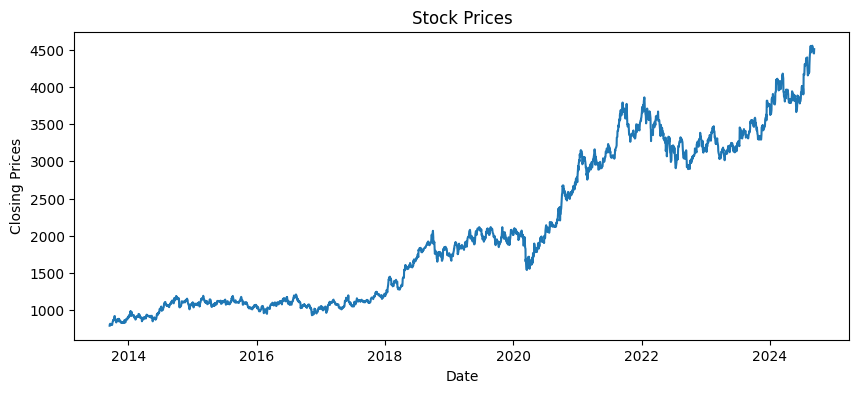

In [18]:
#plot the stock prices
plt.figure(figsize=(10,4))
plt.plot(prices)
plt.ylabel("Closing Prices")
plt.xlabel("Date")
plt.title("Stock Prices")

Text(0.5, 1.0, 'Returns of TCS')

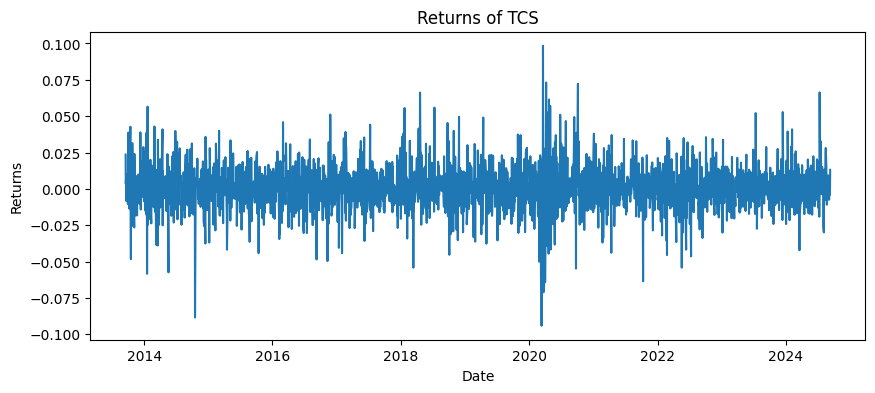

In [19]:
#plot the stock prices
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel("Returns")
plt.xlabel("Date")
plt.title("Returns of TCS")

<function matplotlib.pyplot.show(close=None, block=None)>

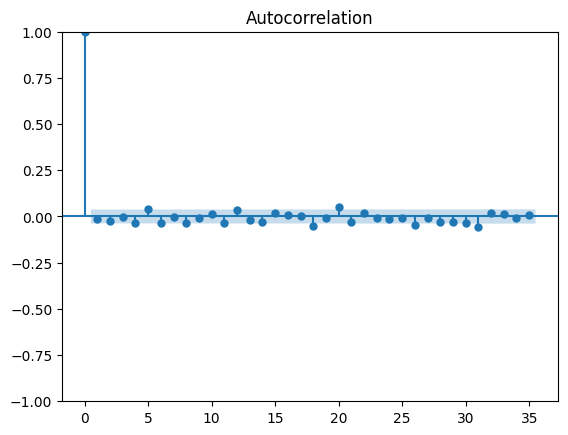

In [20]:
plot_acf(returns)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

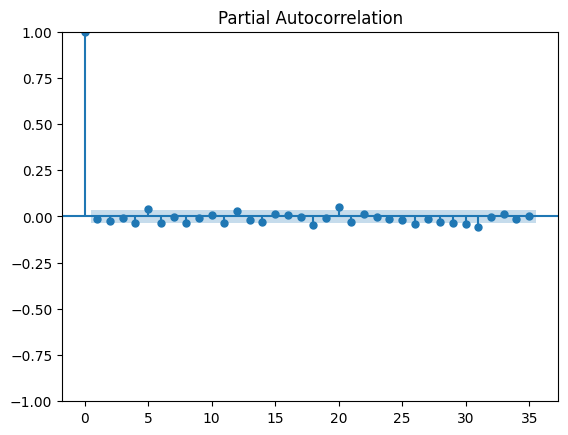

In [21]:
plot_pacf(returns, method='ywm')
plt.show

# Arima

In [22]:
model = ARIMA(prices, order=(7,0,6))
fitted = model.fit()
print(fitted.summary())

c:\Users\ronak\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ronak\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ronak\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ronak\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary startin

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2707
Model:                 ARIMA(7, 0, 6)   Log Likelihood              -13297.371
Date:                Thu, 12 Sep 2024   AIC                          26624.742
Time:                        00:04:32   BIC                          26713.296
Sample:                             0   HQIC                         26656.762
                               - 2707                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2079.6904   2812.168      0.740      0.460   -3432.058    7591.439
ar.L1         -1.2724      0.260     -4.893      0.000      -1.782      -0.763
ar.L2         -0.7989      0.375     -2.129      0.0

c:\Users\ronak\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [27]:
# Forecast the next 10 days
forecasted_values = fitted.forecast(10, alpha=0.05)
print(forecasted_values)

2707    4506.975263
2708    4506.872513
2709    4503.591928
2710    4503.308793
2711    4504.271750
2712    4504.652707
2713    4502.847778
2714    4500.970919
2715    4503.515273
2716    4502.374886
Name: predicted_mean, dtype: float64


c:\Users\ronak\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [28]:
# Predicted price for tomorrow
predicted_price = forecasted_values.values[0]
print(f'The predicted price for {tomorrow} is:', predicted_price)

The predicted price for 2024-09-12 is: 4506.975263401476


In [34]:
fitted_values = fitted.fittedvalues
fitted_values

Date
2013-09-16 00:00:00+05:30    2079.690378
2013-09-17 00:00:00+05:30     791.621602
2013-09-18 00:00:00+05:30     810.241039
2013-09-19 00:00:00+05:30     812.485690
2013-09-20 00:00:00+05:30     817.674422
                                ...     
2024-09-04 00:00:00+05:30    4512.872226
2024-09-05 00:00:00+05:30    4477.423034
2024-09-06 00:00:00+05:30    4480.313444
2024-09-09 00:00:00+05:30    4455.190169
2024-09-10 00:00:00+05:30    4449.204989
Length: 2707, dtype: float64

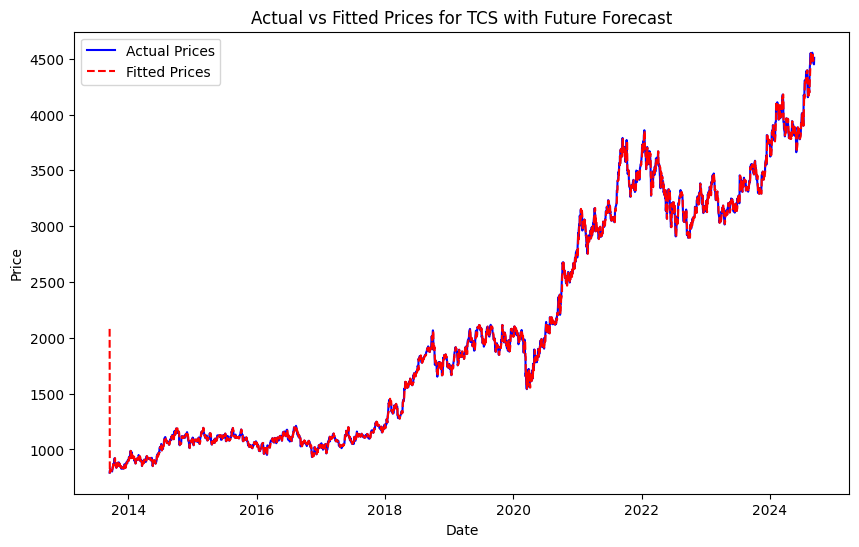

In [41]:
# Plot actual vs fitted (for the entire dataset) and predicted values (for future dates)
plt.figure(figsize=(10,6))

# Plot actual prices
plt.plot(prices, label='Actual Prices', color='blue')

# Plot fitted values (predictions for the past data)
plt.plot(fitted_values, label='Fitted Prices', color='red', linestyle='--')
plt.ylabel('Price')
plt.xlabel('Date')
plt.title('Actual vs Fitted Prices for TCS with Future Forecast')
plt.legend()
plt.show()

# SARIMA

c:\Users\ronak\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ronak\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ronak\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\ronak\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results w

                                      SARIMAX Results                                      
Dep. Variable:                               Close   No. Observations:                 2707
Model:             SARIMAX(7, 0, 2)x(0, 1, [1], 5)   Log Likelihood              -13286.515
Date:                             Thu, 12 Sep 2024   AIC                          26595.029
Time:                                     00:36:16   BIC                          26659.949
Sample:                                          0   HQIC                         26618.505
                                            - 2707                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9678      0.018    -52.868      0.000      -1.004      -0.932
ar.L2          0.9537      

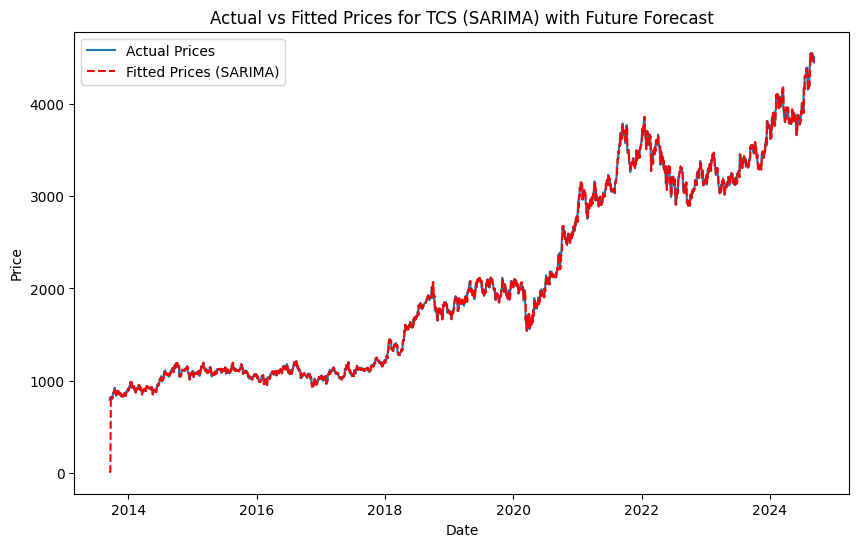

In [49]:
model = SARIMAX(prices, order=(7, 0, 2), seasonal_order=(0, 1, 1, 5))  
fitted = model.fit(disp=False)
print(fitted.summary())

# In-sample prediction (forecast for the entire dataset)
fitted_values = fitted.fittedvalues

# Forecast the next 10 days (out-of-sample)
forecasted_values = fitted.forecast(10, alpha=0.05)
print(forecasted_values)

# Predicted price for tomorrow
predicted_price = forecasted_values.values[0]
print(f'The predicted price for {tomorrow} is:', predicted_price)

# Plot actual vs fitted (for the entire dataset) and predicted values (for future dates)
plt.figure(figsize=(10,6))

# Plot actual prices
plt.plot(prices, label='Actual Prices')

# Plot fitted values (predictions for the past data)
plt.plot(fitted_values, label='Fitted Prices (SARIMA)', color='red', linestyle='--')

plt.ylabel('Price')
plt.xlabel('Date')
plt.title('Actual vs Fitted Prices for TCS (SARIMA) with Future Forecast')
plt.legend()
plt.show()